<a href="https://colab.research.google.com/github/BKirill/MLatFIAN2020_homework/blob/main/MLatFIAN_2020_seminar09_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


# Classifying clothes

[['Pullover' 'Trouser' 'Bag' 'Coat' 'Trouser']
 ['Ankle boot' 'Pullover' 'Pullover' 'T-shirt/top' 'Pullover']
 ['Shirt' 'Ankle boot' 'T-shirt/top' 'Sneaker' 'Sandal']
 ['Coat' 'T-shirt/top' 'Trouser' 'Bag' 'T-shirt/top']
 ['Coat' 'Pullover' 'Shirt' 'Sneaker' 'T-shirt/top']]


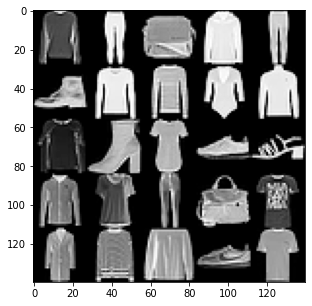

In [2]:
import tensorflow_datasets as tfds

data_train = tfds.load(name="fashion_mnist", split="train").prefetch(60000).cache()
data_test  = tfds.load(name="fashion_mnist", split="test" ).prefetch(10000).cache()

# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 25 images
sample_data = next(iter(data_train.batch(25)))
sample_images = sample_data['image']
sample_labels = sample_data['label']

# Plot the images in a 5x5 grid
plt.figure(figsize=(5, 5))
plt.imshow(
    sample_images.numpy().reshape(5, 5, 28, 28).transpose((0, 2, 1, 3)).reshape(140, 140),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(5, 5)])

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

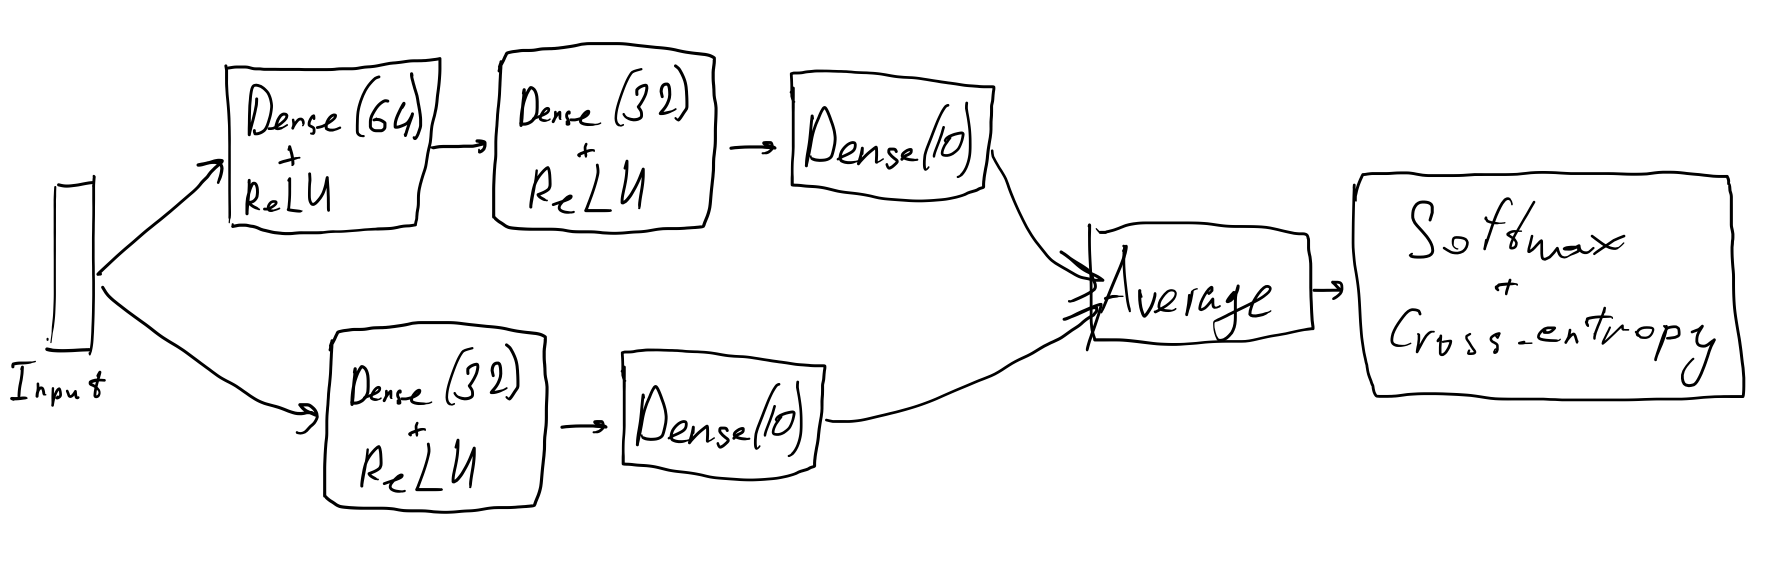

You can:
 - either use low-level API for that (still using `tf.keras.Sequential` models as building blocks)
 - or use `tf.keras.Model` for an arbitrary model (see examples from https://www.tensorflow.org/api_docs/python/tf/keras/Model)

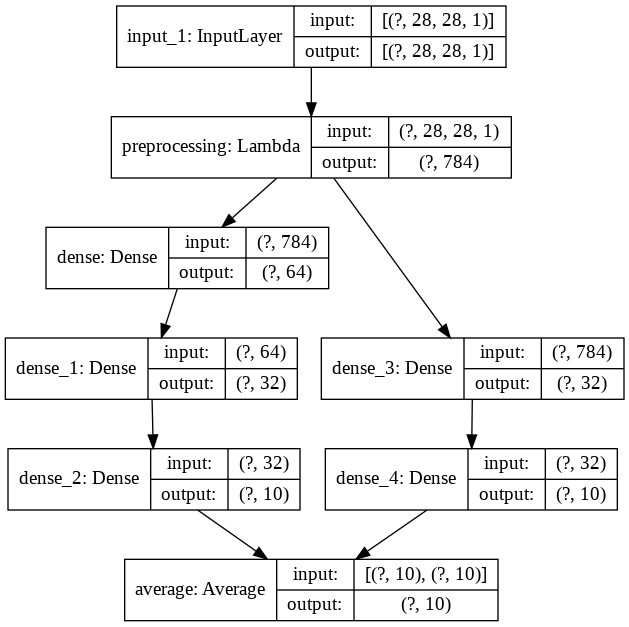

In [3]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Lambda(
      lambda x: tf.reshape(x / 255., (-1, 28*28)),
      input_shape=(28, 28, 1), name='preprocessing'
      )(inputs)
x1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
x1 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x1)
x1 = tf.keras.layers.Dense(10)(x1)
x2 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
x2 = tf.keras.layers.Dense(10)(x2)
outputs = tf.keras.layers.Average()([x1, x2])

model = tf.keras.Model(inputs=inputs, outputs=outputs)
tf.keras.utils.plot_model(model, show_shapes=True)

In [4]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.metrics.SparseCategoricalAccuracy()]
)

In [5]:
def unwrap(x):
  return (x['image'], x['label'])

In [6]:
history = model.fit(x=data_train.map(unwrap).shuffle(60000).batch(1024),
          epochs=25,
          validation_data=data_test.map(unwrap).batch(4096))

Epoch 1/25
59/59 [==============================] - 1s 23ms/step - loss: 1.0424 - sparse_categorical_accuracy: 0.6564 - val_loss: 0.6363 - val_sparse_categorical_accuracy: 0.7866
Epoch 2/25
59/59 [==============================] - 0s 5ms/step - loss: 0.5484 - sparse_categorical_accuracy: 0.8170 - val_loss: 0.5237 - val_sparse_categorical_accuracy: 0.8259
Epoch 3/25
59/59 [==============================] - 0s 5ms/step - loss: 0.4790 - sparse_categorical_accuracy: 0.8353 - val_loss: 0.4827 - val_sparse_categorical_accuracy: 0.8337
Epoch 4/25
59/59 [==============================] - 0s 5ms/step - loss: 0.4430 - sparse_categorical_accuracy: 0.8475 - val_loss: 0.4553 - val_sparse_categorical_accuracy: 0.8430
Epoch 5/25
59/59 [==============================] - 0s 5ms/step - loss: 0.4181 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.4366 - val_sparse_categorical_accuracy: 0.8473
Epoch 6/25
59/59 [==============================] - 0s 5ms/step - loss: 0.3954 - sparse_categorical_accuracy:

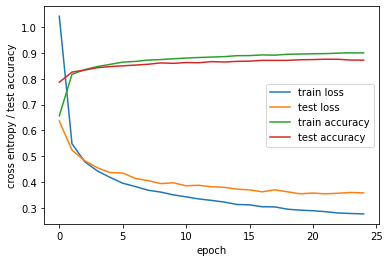

In [7]:
plt.plot(history.history['loss']    , label='train loss')
plt.plot(history.history['val_loss'], label='test loss')

plt.plot(history.history['sparse_categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('cross entropy / test accuracy')
plt.legend();